## Experiments: Scalability Number of Series RSAST

In [1]:
# Import the os module
import os
import sys
path = '/home/nicolas/random_sast/'

try:
    os.chdir(path)
    print("Current working directory: {0}".format(os.getcwd()))
except FileNotFoundError:
    print("Directory: {0} does not exist".format(path))
except NotADirectoryError:
    print("{0} is not a directory".format(path))
except PermissionError:
    print("You do not have permissions to change to {0}".format(path))

sys.path.append('/home/nicolas/random_sast/sast')

Current working directory: /home/nicolas/random_sast


### Overall analysis

In [2]:
import time 
import os 
import gc
import numpy as np

import sys
sys.path.append(os.path.abspath("."))

from utils_sast import *
from sast import *

from sklearn.linear_model import RidgeClassifierCV

from sast import from_2d_array_to_nested
from sktime.classification.kernel_based import RocketClassifier
from sktime.transformations.panel.rocket import Rocket
#from sktime.transformations.panel.shapelets import *


from matplotlib.ticker import FuncFormatter
#from convst.classifiers import R_DST_Ridge
#from aeon.classification.shapelet_based import RDSTClassifier
from aeon.transformations.collection.shapelet_based import (
    RandomDilatedShapeletTransform
)


/home/nicolas/random_sast


/home/nicolas/.local/lib/python3.10/site-packages/mass_ts/_mass_ts.py:17: UserWarning: GPU support will not work. You must pip install mass-ts[gpu].
  warnings.warn(


In [3]:
'''
ds = 'Chinatown' # the dataset to use


#max_exponent = 20 # go up to series of length 2^max_exponent

max_exponent = 10 # go up to series of length 2^max_exponent

path="/home/nicolas/random_sast/sast/data/"
ds_train_lds , ds_test_lds = load_dataset(ds_folder=path,ds_name=ds,shuffle=False)
X_test, y_test = format_dataset(ds_test_lds)
X_train_base, y_train_base = format_dataset(ds_train_lds)

    
# fill na
#train_ds.fillna(0, axis=1, inplace=True)
#test_ds.fillna(0, axis=1, inplace=True)

#X_train_all, y_train = format_dataset(train_ds, shuffle=True)
#X_test_all, y_test_all = format_dataset(test_ds)

df_result = {}
list_score = []
list_time_fit = []
list_time_test = []
list_dataset = []
list_hyperparameter = []
list_method = []
list_rpoint = []
list_nb_per_class = []
list_number_series = []


solver_lr='lbfgs'

for i in range(4, max_exponent+1):

    nb_series = 2**i

    idx = np.random.choice(np.arange(len(y_train_base)), size=nb_series, replace=True)
    X_train = X_train_base[idx]
    y_train = y_train_base[idx]

    print('Shape:', X_train.shape)

    max_shp_length = X_train.shape[1]

    print("--number_series: 2^"+str(i))

    p=10
    k=1
    print("RSAST ACF&PACF: n_random_points="+str(p)+" nb_inst_per_class="+str(k))
    clf = LogisticRegression( solver=solver_lr)
    #clf = RidgeClassifierCV(alphas=np.logspace(-3, 3, 10))
    start = time.time()
    
    rsast_ridge = RSAST(n_random_points=p,nb_inst_per_class=k, len_method="both", classifier=clf)
    rsast_ridge.fit(X_train, y_train)
    end = time.time()
    time_fit=end-start

    start = time.time()
    score=rsast_ridge.score(X_test, y_test) 
    end = time.time()
    time_test=end-start

    list_score.append(score)
    list_time_fit.append(time_fit)
    list_time_test.append(time_test)


    list_dataset.append(ds)
    list_hyperparameter.append("ACF&PACF: n_random_points="+str(p)+" nb_inst_per_class="+str(k))
    list_rpoint.append(str(p))
    list_nb_per_class.append(str(k))
    list_method.append("RSAST ACF&PACF")
    list_number_series.append(nb_series)

    p=30
    k=1
    print("RSAST ACF&PACF: n_random_points="+str(p)+" nb_inst_per_class="+str(k))
    clf = LogisticRegression( solver=solver_lr)
    #clf = RidgeClassifierCV(alphas=np.logspace(-3, 3, 10))
    start = time.time()
    
    rsast_ridge = RSAST(n_random_points=p,nb_inst_per_class=k, len_method="both", classifier=clf)
    rsast_ridge.fit(X_train, y_train)
    end = time.time()

    time_fit=end-start

    start = time.time()
    score=rsast_ridge.score(X_test, y_test) 
    end = time.time()
    time_test=end-start

    list_score.append(score)
    list_time_fit.append(time_fit)
    list_time_test.append(time_test)

    list_dataset.append(ds)
    list_hyperparameter.append("ACF&PACF: n_random_points="+str(p)+" nb_inst_per_class="+str(k))
    list_rpoint.append(str(p))
    list_nb_per_class.append(str(k))
    list_method.append("RSAST ACF&PACF")
    list_number_series.append(nb_series)

    p=10
    k=10
    print("RSAST ACF&PACF: n_random_points="+str(p)+" nb_inst_per_class="+str(k))
    clf = LogisticRegression( solver=solver_lr)
    #clf = RidgeClassifierCV(alphas=np.logspace(-3, 3, 10))
    start = time.time()
    
    rsast_ridge = RSAST(n_random_points=p,nb_inst_per_class=k, len_method="both", classifier=clf)
    rsast_ridge.fit(X_train, y_train)
    end = time.time()

    time_fit=end-start

    start = time.time()
    score=rsast_ridge.score(X_test, y_test) 
    end = time.time()
    time_test=end-start

    list_score.append(score)
    list_time_fit.append(time_fit)
    list_time_test.append(time_test)

    list_dataset.append(ds)
    list_hyperparameter.append("ACF&PACF: n_random_points="+str(p)+" nb_inst_per_class="+str(k))
    list_rpoint.append(str(p))
    list_nb_per_class.append(str(k))
    list_method.append("RSAST ACF&PACF")
    list_number_series.append(nb_series)

    p=30
    k=10
    print("RSAST ACF&PACF: n_random_points="+str(p)+" nb_inst_per_class="+str(k))
    clf = LogisticRegression( solver=solver_lr)
    #clf = RidgeClassifierCV(alphas=np.logspace(-3, 3, 10))
    start = time.time()
    
    rsast_ridge = RSAST(n_random_points=p,nb_inst_per_class=k, len_method="both", classifier=clf)
    rsast_ridge.fit(X_train, y_train)
    end = time.time()

    time_fit=end-start

    start = time.time()
    score=rsast_ridge.score(X_test, y_test) 
    end = time.time()
    time_test=end-start

    list_score.append(score)
    list_time_fit.append(time_fit)
    list_time_test.append(time_test)

    list_dataset.append(ds)
    list_hyperparameter.append("ACF&PACF: n_random_points="+str(p)+" nb_inst_per_class="+str(k))
    list_rpoint.append(str(p))
    list_nb_per_class.append(str(k))
    list_method.append("RSAST ACF&PACF")
    list_number_series.append(nb_series)

    print("ROCKET LR: kernels=10_000")

    clf = LogisticRegression(solver=solver_lr)

    start = time.time()
    trf = Rocket(num_kernels=10_000) 
    trf.fit(from_2d_array_to_nested(X_train), y_train)
    X_train_tranf = trf.transform(from_2d_array_to_nested(X_train)) 
    clf.fit(X_train_tranf,y_train)
    end = time.time()
    time_fit=end-start

    start = time.time()
    X_test_tranf = trf.transform(from_2d_array_to_nested(X_test),y_test) 
    score=clf.score(X_test_tranf,y_test)
    end = time.time()
    time_test=end-start

    list_score.append(score)
    list_time_fit.append(time_fit)
    list_time_test.append(time_test)

    list_dataset.append(ds)
    list_hyperparameter.append("ROCKET LR: num_kernels=10_000")
    list_rpoint.append(str(0))
    list_nb_per_class.append(str(0))
    list_method.append("Rocket LR")
    list_number_series.append(nb_series)


    k=1
    #candidate_lengths = np.arange(min_shp_length, max_shp_length+1)
    clf = LogisticRegression( solver=solver_lr)
    
    min_shp_length = 3
    max_shp_length = X_train.shape[1]
    candidate_lengths = np.arange(3, max_shp_length)
    min_shp_length = min(candidate_lengths)
    max_shp_length = max(candidate_lengths)
    print("SAST: min_shapelet_length="+str(min_shp_length)+" max_shapelet_length="+str(X_train.shape[1]))
    start = time.time()


    sast_ridge = SAST(cand_length_list=candidate_lengths,
                            nb_inst_per_class=k, classifier=clf)

    sast_ridge.fit(X_train, y_train)
    end = time.time()
    time_fit=end-start

    start = time.time()
    score=sast_ridge.score(X_test, y_test) 
    end = time.time()
    time_test=end-start

    list_score.append(score)
    list_time_fit.append(time_fit)
    list_time_test.append(time_test)

    list_dataset.append(ds)
    list_hyperparameter.append("SAST: min_shapelet_length="+str(min_shp_length)+" max_shapelet_length=m")
    list_rpoint.append(str(0))
    list_nb_per_class.append(str(0))
    list_method.append("SAST")  
    list_number_series.append(nb_series)


    print("RDST: n_shapelets=10_000")
    """
    X_train_rdst=X_train[:, np.newaxis, :]
    y_train_rdst=np.asarray([int(x_s) for x_s in y_train])

    X_test_rdst=X_test[:, np.newaxis, :]
    y_test_rdst=np.asarray([int(x_s) for x_s in y_test])

    start = time.time()
    rdst = RDSTClassifier()
    rdst.fit(X_train_rdst, y_train_rdst)
    end = time.time()
    time_fit=end-start
    start = time.time()
    score=rdst.score(X_test_rdst, y_test_rdst)
    end = time.time()
    time_test=end-start
    """
    clf = LogisticRegression(solver=solver_lr)

    start = time.time()
    rdst = RandomDilatedShapeletTransform() 
    rdst.fit(from_2d_array_to_nested(X_train),y_train)
    X_train_tranf = rdst.transform(from_2d_array_to_nested(X_train)) 
    clf.fit(X_train_tranf,y_train)
    end = time.time()
    time_fit=end-start

    start = time.time()
    X_test_tranf = rdst.transform(from_2d_array_to_nested(X_test)) 
    score=clf.score(X_test_tranf,y_test)
    end = time.time()
    time_test=end-start

    list_score.append(score)
    list_time_fit.append(time_fit)
    list_time_test.append(time_test)

    list_dataset.append(ds)
    list_hyperparameter.append("RDST: n_shapelets=10_000")
    list_rpoint.append(str(0))
    list_nb_per_class.append(str(0))
    list_method.append("RDST")  
    list_number_series.append(nb_series)
    """
    min_shp_length = 3
    print("STC: min_shapelet_length="+str(min_shp_length)+" max_shapelet_length="+str(np.inf))

    max_shp_length = X_train.shape[1]
    start = time.time()
    #Creating a ShapeletTransform and fitting
    st = ShapeletTransform(min_shapelet_length=min_shp_length, max_shapelet_length=np.inf)
    X_train_sktime = from_2d_array_to_nested(pd.DataFrame(X_train))
    X_test_sktime = from_2d_array_to_nested(pd.DataFrame(X_test))
    st.fit(X_train_sktime, y_train)
    #Making the tranformation of time series and training a RandomForestClassifier model
    X_test_transformed = st.transform(X_test_sktime)
    X_train_transformed = st.transform(X_train_sktime)
    clf = RandomForestClassifier()
    clf.fit(X_train_transformed, y_train)

    end = time.time()
    list_score.append(clf.score(X_test_transformed, y_test))
    list_time.append(end-start)
    list_dataset.append(ds)
    list_hyperparameter.append("min_shapelet_length="+str(min_shp_length)+" max_shapelet_length="+str(max_shp_length))
    list_rpoint.append(str(0))
    list_nb_per_class.append(str(0))
    list_method.append("STC")  
    """
        


df_result['accuracy']=list_score
df_result['time_fit']=list_time_fit
df_result['time_test']=list_time_test
df_result['dataset_name']=list_dataset
df_result['hyperparameter']=list_hyperparameter
df_result['rpoint']=list_rpoint
df_result['nb_per_class']=list_nb_per_class
df_result['classifier_name']=list_method
df_result['number_series']=list_number_series

df_result=pd.DataFrame(df_result)
# export a overall dataset with the comparison
df_result.to_csv("ExperimentationRSAST/results_comparison_accuracy/df_overall_comparison_scalability_number_of_seriesLR.csv")

'''
print('--All done')


--All done


In [4]:
df_result=pd.read_csv("ExperimentationRSAST/results_comparison_accuracy/df_overall_comparison_scalability_number_of_seriesLR.csv")
df_result=df_result[~df_result["hyperparameter"].isin(["ACF&PACF: n_random_points=30 nb_inst_per_class=10"])]


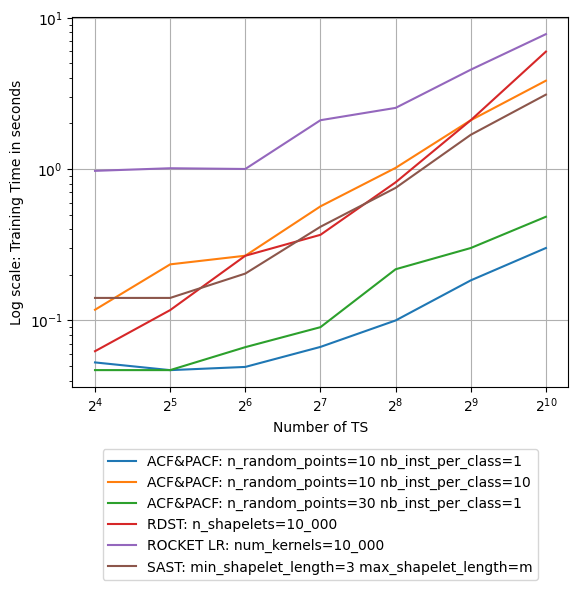

In [9]:

df_result["log_number_series"]=np.log2(df_result["number_series"])
#x_ticks=[5,6,7,8]
#df_result=df_result[df_result["log_number_series"].isin(x_ticks)]
df_result_pv=df_result.pivot_table(values="time_fit", index="log_number_series", columns="hyperparameter")
df_result_pv.plot.line(grid=True, xlabel="Number of TS", ylabel="Log scale: Training Time in seconds")


#place legend in center right of plot
plt.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center')

# Define the custom formatter function
def exponent_of_2(x, pos):
    return r'$2^{{{}}}$'.format(int(x))

#plt.xticks(ticks=x_ticks, labels=x_ticks)

# Set the x-axis formatter as the custom formatter function
plt.gca().xaxis.set_major_formatter(FuncFormatter(exponent_of_2))
plt.yscale("log")  
plt.savefig("ExperimentationRSAST/images_scalability/scalability_ns.png")
plt.show()

In [6]:
def seconds_to_readable_time(seconds):
    

    hours, remainder = divmod(seconds, 3600)

    minutes, remainder = divmod(remainder, 60)

    seconds=remainder
    #seconds, milliseconds = divmod(remainder, 1)

    
    # Format the time components
    formatted_time = ""
    if hours > 0:
        formatted_time += f"{int(hours)}h "
    if minutes > 0:
        formatted_time += f"{int(minutes)}m "
    if seconds > 0:
        formatted_time += f"{round(seconds,2)}s "
    #if milliseconds > 0:
    #    formatted_time += f"{int(milliseconds * 1000)}ms"

    # Remove trailing comma and space
    formatted_time = formatted_time.rstrip(', ')

    return formatted_time
    

In [7]:
df_result_pv=df_result[df_result["log_number_series"].isin([4,10])]
df_result_pv['time_fit_formatted']=df_result_pv["time_fit"].apply(seconds_to_readable_time).astype(str)
df_result_pv
df_result_pv.pivot(index=['hyperparameter'], columns=['number_series'], values="time_fit_formatted")
#df_result[df_result["hyperparameter"].isin(["ACF&PACF: n_random_points=10 nb_inst_per_class=10"])]
#df_result[df_result["hyperparameter"].isin(["ROCKET LR: num_kernels=10_000"])]
#df_result[df_result["hyperparameter"].isin(["SAST: min_shapelet_length=3 max_shapelet_length=m"])]
#df_result[df_result["hyperparameter"].isin(["RDST: n_shapelets=10_000"])]

/tmp/ipykernel_15765/4005770821.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result_pv['time_fit_formatted']=df_result_pv["time_fit"].apply(seconds_to_readable_time).astype(str)


number_series,16,1024
hyperparameter,,
ACF&PACF: n_random_points=10 nb_inst_per_class=1,0.05s,0.3s
ACF&PACF: n_random_points=10 nb_inst_per_class=10,0.12s,3.84s
ACF&PACF: n_random_points=30 nb_inst_per_class=1,0.05s,0.48s
RDST: n_shapelets=10_000,0.06s,5.97s
ROCKET LR: num_kernels=10_000,0.97s,7.79s
SAST: min_shapelet_length=3 max_shapelet_length=m,0.14s,3.1s
